# Reward Mean Comparisons Across Variants of Intent Inference

This is a plot and figure generating pipelines for comparing lowerbound, adaptability with oracle info, and upperbound.

Check which python, check and select most available GPU.

In [20]:
import sys
print(sys.executable)
import os
import subprocess

# Get GPU availability using nvidia-smi
gpu_query = "nvidia-smi --query-gpu=index,memory.free --format=csv,noheader,nounits"
gpu_info = subprocess.check_output(gpu_query, shell=True).decode("utf-8")

# Parse the output and find the GPU with the most free memory
gpu_list = [line.split(",") for line in gpu_info.strip().split("\n")]
gpu_list = [(int(idx), int(mem)) for idx, mem in gpu_list]  # Convert to int
best_gpu = sorted(gpu_list, key=lambda x: -x[1])[0][0]  # Choose GPU with max free memory

# Set the environment variable
os.environ["CUDA_VISIBLE_DEVICES"] = str(best_gpu)

print(f"Using GPU {best_gpu} with most available memory.")

os.chdir("/nas/ucb/sandytanwisuth/ser/value-of-intent")
print("Working directory:", os.getcwd())

/nas/ucb/sandytanwisuth/miniconda3/envs/voi/bin/python
Using GPU 2 with most available memory.
Working directory: /nas/ucb/sandytanwisuth/ser/value-of-intent


Neccesities imports

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Load metrics files and check content

In [22]:
# Cramped Room
# ub_file_cramped_room = "saved_models/20250225/cramped_room/ub_ippo_oc_cramped_room_20250225_173039_30/ub_metrics.npz"
# op_file_cramped_room = "saved_models/20250226/cramped_room/op_ippo_oc_cramped_room_20250226_010746_30/op_metrics.npz"
# lb_file_cramped_room = "saved_models/20250226/cramped_room/lb_ippo_oc_cramped_room_20250226_010846_30/lb_metrics.npz"

# Asymmetric Advantages
# ub_file_asymm_advantages = "saved_models/20250226/asymm_advantages/ub_ippo_oc_asymm_advantages_20250226_211907_30/ub_metrics.npz"
# op_file_asymm_advantages = "saved_models/20250226/asymm_advantages/op_ippo_oc_asymm_advantages_20250226_225227_30/op_metrics.npz"
# lb_file_asymm_advantages = "saved_models/20250226/asymm_advantages/lb_ippo_oc_asymm_advantages_20250226_225515_30/lb_metrics.npz"

# Coordination Ring
ub_file_coord_ring = "saved_models/20250228/coord_ring/ub_ippo_oc_coord_ring_20250228_165554_30/ub_metrics.npz"
# op_file_coord_ring = "saved_models/20250227/coord_ring/op_ippo_oc_coord_ring_20250227_121104_30/op_metrics.npz"
# lb_file_coord_ring = "saved_models/20250227/coord_ring/lb_ippo_oc_coord_ring_20250227_121230_30/lb_metrics.npz"

# Countercircuit
ub_file_countercircuit = "saved_models/20250301/counter_circuit/ub_ippo_oc_counter_circuit_20250301_104620_30/ub_metrics.npz"
# op_file_countercircuit = "saved_models/20250227/countercircuit/op_ippo_oc_countercircuit_20250227_011612_30/op_metrics.npz"
# lb_file_countercircuit = "saved_models/20250227/countercircuit/lb_ippo_oc_countercircuit_20250227_011709_30/lb_metrics.npz"

# Forced Coordination
ub_file_forced_coord = "saved_models/20250228/forced_coord/ub_ippo_oc_forced_coord_20250228_170600_30/ub_metrics.npz"
op_file_forced_coord = "saved_models/20250301/forced_coord/op_ippo_oc_forced_coord_20250301_105109_30/op_metrics.npz"
lb_file_forced_coord = "saved_models/20250301/forced_coord/lb_ippo_oc_forced_coord_20250301_105157_30/lb_metrics.npz"

Check the shape of the returned_episode_returns for each variant and each layout should all be the same shape

In [23]:
# Cramped Room
# ub_metrics_cramped_room = np.load(ub_file_cramped_room)
# print(f"Shape UB Cramped Room: {ub_metrics_cramped_room['returned_episode_returns'].shape}")
# op_metrics_cramped_room = np.load(op_file_cramped_room)
# print(f"Shape OP Cramped Room: {ub_metrics_cramped_room['returned_episode_returns'].shape}")
# lb_metrics_cramped_room = np.load(lb_file_cramped_room)
# print(f"Shape LB Cramped Room: {ub_metrics_cramped_room['returned_episode_returns'].shape}")

# Asymmetric Advantages
# ub_metrics_asymm_advantages = np.load(ub_file_asymm_advantages)
# print(f"Shape UB Asymm Advantages: {ub_metrics_asymm_advantages['returned_episode_returns'].shape}")
#op_metrics_asymm_advantages = np.load(op_file_asymm_advantages)
# print(f"Shape OP Asymm Advantages: {ub_metrics_cramped_room['returned_episode_returns'].shape}")
#lb_metrics_asymm_advantages = np.load(lb_file_asymm_advantages)
# print(f"Shape LB Asymm Advantages: {ub_metrics_cramped_room['returned_episode_returns'].shape}")

# Coordination Ring
ub_metrics_coord_ring = np.load(ub_file_coord_ring)
print(f"Shape UB Coordination Ring: {ub_metrics_coord_ring['returned_episode_returns'].shape}")
# op_metrics_coord_ring = np.load(op_file_coord_ring)
# print(f"Shape OP Coordination Ring: {op_metrics_coord_ring['returned_episode_returns'].shape}")
# lb_metrics_coord_ring = np.load(lb_file_coord_ring)
# print(f"Shape LB Coordination Ring: {lb_metrics_coord_ring['returned_episode_returns'].shape}")

# Countercircuit
ub_metrics_countercircuit = np.load(ub_file_countercircuit)
print(f"Shape UB Countercircuit: {ub_metrics_countercircuit['returned_episode_returns'].shape}")
# op_metrics_countercircuit = np.load(op_file_countercircuit)
# print(f"Shape: {ub_metrics_countercircuit['returned_episode_returns'].shape}")
# lb_metrics_countercircuit = np.load(lb_file_countercircuit)
# print(f"Shape: {ub_metrics_countercircuit['returned_episode_returns'].shape}")

# Forced Coordination
ub_metrics_forced_coord = np.load(ub_file_forced_coord)
print(f"Shape UB Forced Coordination: {ub_metrics_forced_coord['returned_episode_returns'].shape}")
op_metrics_forced_coord = np.load(op_file_forced_coord)
print(f"Shape OP Forced Coordination: {ub_metrics_forced_coord['returned_episode_returns'].shape}")
lb_metrics_forced_coord = np.load(lb_file_forced_coord)
print(f"Shape LB Forced Coordination: {ub_metrics_forced_coord['returned_episode_returns'].shape}")

Shape UB Coordination Ring: (128, 24414)
Shape UB Countercircuit: (128, 24414)
Shape UB Forced Coordination: (128, 24414)
Shape OP Forced Coordination: (128, 24414)
Shape LB Forced Coordination: (128, 24414)


#### Cramped Room

Upper Bound

In [18]:
ub_returns_cramped_room = ub_metrics_cramped_room['returned_episode_returns']
ub_reward_mean_cramped_room = ub_returns_cramped_room.mean(axis=0)
ub_reward_std_cramped_room = ub_returns_cramped_room.std(axis=0)
ub_reward_std_err_cramped_room = ub_reward_std_cramped_room / np.sqrt(ub_returns_cramped_room.shape[0])

plt.figure()

for seed_idx in range(ub_returns_cramped_room.shape[0]):
    plt.plot(ub_returns_cramped_room[seed_idx], alpha=0.4, label=f'Seed {seed_idx}')

plt.plot(ub_reward_mean_cramped_room, label='Mean Across All Seeds')

plt.fill_between(
    range(len(ub_reward_mean_cramped_room)),
    ub_reward_mean_cramped_room - ub_reward_std_err_cramped_room,
    ub_reward_mean_cramped_room + ub_reward_std_err_cramped_room,
    alpha=0.2,
    color='gray',
    label='Mean ± Std Error'
)

plt.xlabel("Update Step")
plt.ylabel("Returned Episode Returns")
plt.title("Cramped Room: Upper Bound: Per-Seed Performance and Average with Std Error")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

NameError: name 'ub_metrics_cramped_room' is not defined

Oracle

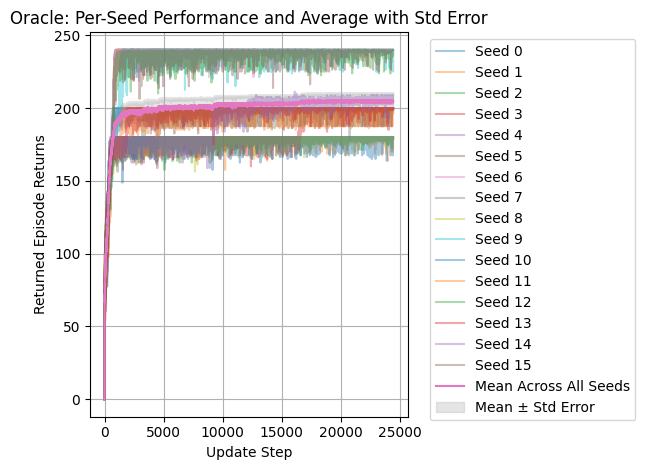

In [54]:
op_returns_cramped_room = op_metrics_cramped_room['returned_episode_returns']
op_reward_mean_cramped_room = op_returns_cramped_room.mean(axis=0)
op_reward_std_cramped_room = op_returns_cramped_room.std(axis=0)
op_reward_std_err_cramped_room = op_reward_std_cramped_room / np.sqrt(op_returns_cramped_room.shape[0])

plt.figure()

for seed_idx in range(op_returns_cramped_room.shape[0]):
    plt.plot(op_returns_cramped_room[seed_idx], alpha=0.4, label=f'Seed {seed_idx}')

plt.plot(op_reward_mean_cramped_room, label='Mean Across All Seeds')

plt.fill_between(
    range(len(op_reward_mean_cramped_room)),
    op_reward_mean_cramped_room - op_reward_std_err_cramped_room,
    op_reward_mean_cramped_room + op_reward_std_err_cramped_room,
    alpha=0.2,
    color='gray',
    label='Mean ± Std Error'
)

plt.xlabel("Update Step")
plt.ylabel("Returned Episode Returns")
plt.title("Oracle: Per-Seed Performance and Average with Std Error")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

Lower Bound

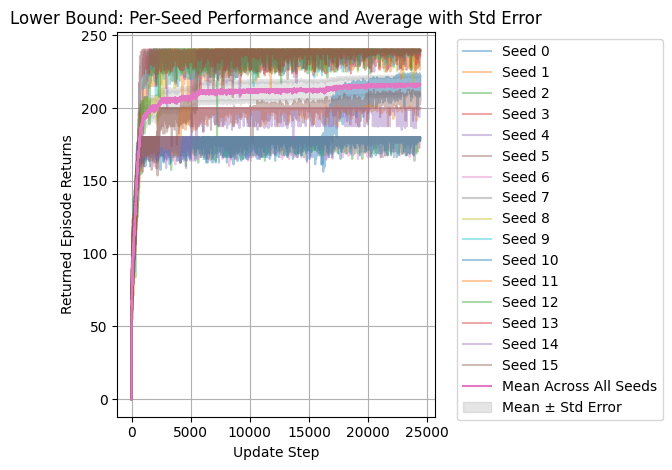

In [55]:
lb_returns_cramped_room = lb_metrics_cramped_room['returned_episode_returns']
lb_reward_mean_cramped_room = lb_returns_cramped_room.mean(axis=0)
lb_reward_std_cramped_room = lb_returns_cramped_room.std(axis=0)
lb_reward_std_err_cramped_room = lb_reward_std_cramped_room / np.sqrt(lb_returns_cramped_room.shape[0])

plt.figure()

for seed_idx in range(lb_returns_cramped_room.shape[0]):
    plt.plot(lb_returns_cramped_room[seed_idx], alpha=0.4, label=f'Seed {seed_idx}')

plt.plot(lb_reward_mean_cramped_room, label='Mean Across All Seeds')

plt.fill_between(
    range(len(lb_reward_mean_cramped_room)),
    lb_reward_mean_cramped_room - lb_reward_std_err_cramped_room,
    lb_reward_mean_cramped_room + lb_reward_std_err_cramped_room,
    alpha=0.2,
    color='gray',
    label='Mean ± Std Error'
)

plt.xlabel("Update Step")
plt.ylabel("Returned Episode Returns")
plt.title("Lower Bound: Per-Seed Performance and Average with Std Error")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

Comparing returned_episode_returns

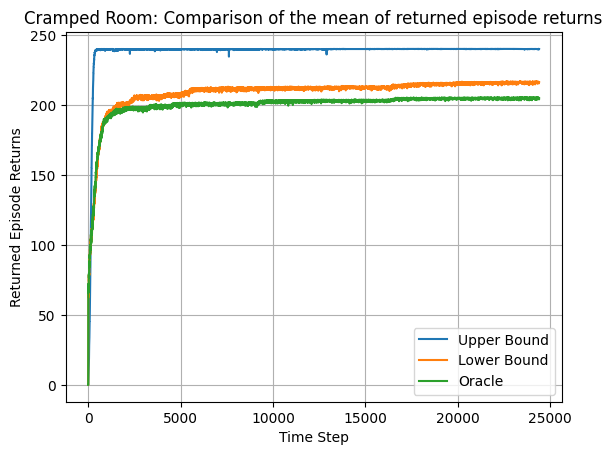

In [56]:
plt.figure()
plt.plot(ub_returns_cramped_room.mean(axis=0), label='Upper Bound')
plt.plot(lb_returns_cramped_room.mean(axis=0), label='Lower Bound')
plt.plot(op_returns_cramped_room.mean(axis=0), label='Oracle')
plt.title('Cramped Room: Comparison of the mean of returned episode returns')
plt.xlabel('Time Step')
plt.ylabel('Returned Episode Returns')
plt.legend()
plt.grid()
plt.show()

Summary Statistics

       Variant  Min Return  Max Return  Mean Return  Std Deviation
0  Upper Bound         0.0       240.0   238.315826      16.088335
1       Oracle         0.0       240.0   200.017075      26.087473
2  Lower Bound         0.0       240.0   208.942886      30.417301


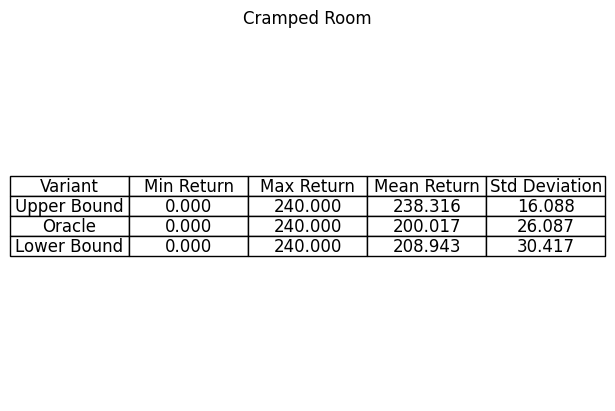

In [69]:
summary_data_cramped_room = {
    'Variant': ['Upper Bound', 'Oracle', 'Lower Bound'],
    'Min Return': [ub_returns_cramped_room.min(), op_returns_cramped_room.min(),lb_returns_cramped_room.min()],
    'Max Return': [ub_returns_cramped_room.max(), op_returns_cramped_room.max(), lb_returns_cramped_room.max()],
    'Mean Return': [ub_returns_cramped_room.mean(), op_returns_cramped_room.mean(), lb_returns_cramped_room.mean()],
    'Std Deviation': [ub_returns_cramped_room.std(), op_returns_cramped_room.std(), lb_returns_cramped_room.std()]
}

summary_df_cramped_room = pd.DataFrame(summary_data_cramped_room)
print(summary_df_cramped_room)

# summary_df.iloc[:, 1:] = summary_df.iloc[:, 1:].round(3)

formatted_df_cramped_room = summary_df_cramped_room.copy()
for col in formatted_df_cramped_room.columns[1:]:
    formatted_df_cramped_room[col] = formatted_df_cramped_room[col].apply(lambda x: f"{x:.3f}")

fig, ax = plt.subplots()
ax.axis('tight')
ax.axis('off')
table = ax.table(
    cellText=formatted_df_cramped_room.values,
    colLabels=formatted_df_cramped_room.columns,
    cellLoc='center',
    loc='center'
)
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)

plt.title("Cramped Room")
plt.show()

#### Asymm Advantages

Upper Bound

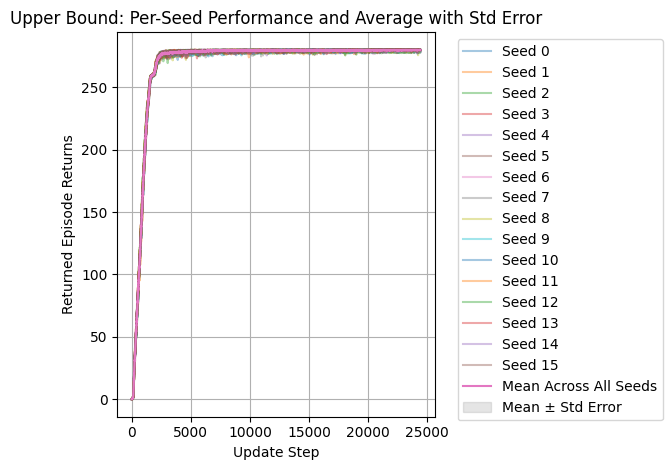

In [ ]:
ub_returns_asymm = ub_metrics_asymm_advantages['returned_episode_returns']
ub_reward_mean_asymm = ub_returns_asymm.mean(axis=0)
ub_reward_std_asymm = ub_returns_asymm.std(axis=0)
ub_reward_std_err_asymm = ub_reward_std_asymm / np.sqrt(ub_returns_asymm.shape[0])

plt.figure()

for seed_idx in range(ub_returns_asymm.shape[0]):
    plt.plot(ub_returns_asymm[seed_idx], alpha=0.4, label=f'Seed {seed_idx}')

plt.plot(ub_reward_mean_asymm, label='Mean Across All Seeds')

plt.fill_between(
    range(len(ub_reward_mean_asymm)),
    ub_reward_mean_asymm - ub_reward_std_err_asymm,
    ub_reward_mean_asymm + ub_reward_std_err_asymm,
    alpha=0.2,
    color='gray',
    label='Mean ± Std Error'
)

plt.xlabel("Update Step")
plt.ylabel("Returned Episode Returns")
plt.title("Asymmetric Advantages: Upper Bound: Per-Seed Performance and Average with Std Error")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

Oracle

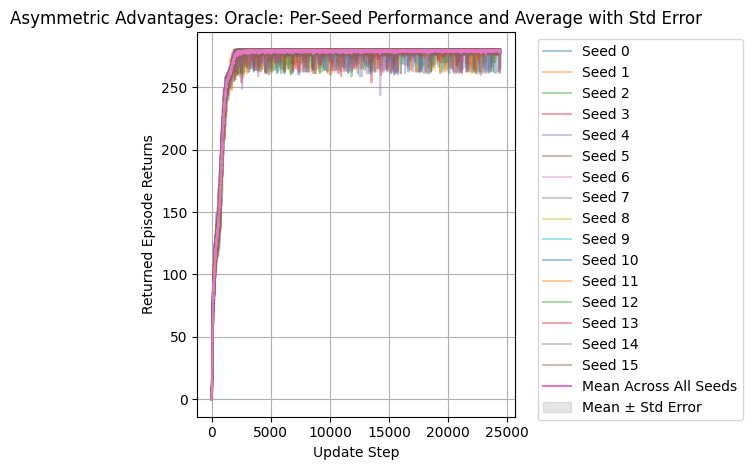

In [79]:
op_returns_asymm = op_metrics_asymm_advantages['returned_episode_returns']
op_reward_mean_asymm = op_returns_asymm.mean(axis=0)
op_reward_std_asymm = op_returns_asymm.std(axis=0)
op_reward_std_err_asymm = op_reward_std_asymm / np.sqrt(op_returns_asymm.shape[0])

plt.figure()

for seed_idx in range(op_returns_asymm.shape[0]):
    plt.plot(op_returns_asymm[seed_idx], alpha=0.4, label=f'Seed {seed_idx}')

plt.plot(op_reward_mean_asymm, label='Mean Across All Seeds')

plt.fill_between(
    range(len(op_reward_mean_asymm)),
    op_reward_mean_asymm - op_reward_std_err_asymm,
    op_reward_mean_asymm + op_reward_std_err_asymm,
    alpha=0.2,
    color='gray',
    label='Mean ± Std Error'
)

plt.xlabel("Update Step")
plt.ylabel("Returned Episode Returns")
plt.title("Asymmetric Advantages: Oracle: Per-Seed Performance and Average with Std Error")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

Lower Bound

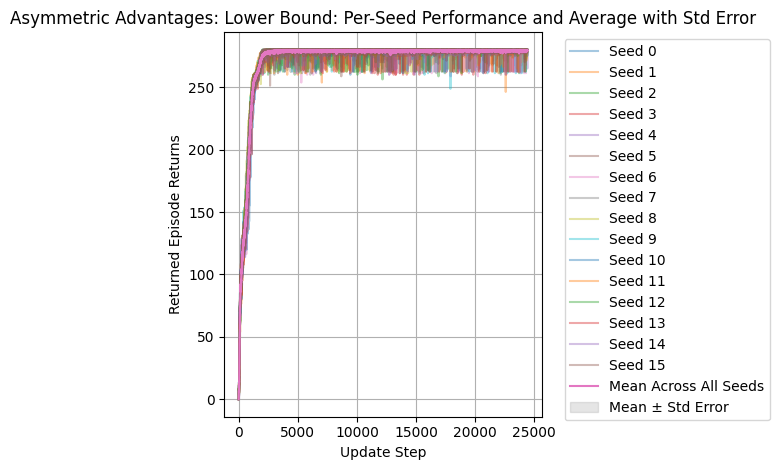

In [80]:
lb_returns_asymm = lb_metrics_asymm_advantages['returned_episode_returns']
lb_reward_mean_asymm = lb_returns_asymm.mean(axis=0)
lb_reward_std_asymm = lb_returns_asymm.std(axis=0)
lb_reward_std_err_asymm = lb_reward_std_asymm / np.sqrt(lb_returns_asymm.shape[0])

plt.figure()

for seed_idx in range(lb_returns_asymm.shape[0]):
    plt.plot(lb_returns_asymm[seed_idx], alpha=0.4, label=f'Seed {seed_idx}')

plt.plot(lb_reward_mean_asymm, label='Mean Across All Seeds')

plt.fill_between(
    range(len(lb_reward_mean_asymm)),
    lb_reward_mean_asymm - lb_reward_std_err_asymm,
    lb_reward_mean_asymm + lb_reward_std_err_asymm,
    alpha=0.2,
    color='gray',
    label='Mean ± Std Error'
)

plt.xlabel("Update Step")
plt.ylabel("Returned Episode Returns")
plt.title("Asymmetric Advantages: Lower Bound: Per-Seed Performance and Average with Std Error")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

Summary Statistics

       Variant  Min Return  Max Return  Mean Return  Std Deviation
0  Upper Bound         0.0       280.0   269.397430      41.623718
1       Oracle         0.0       280.0   272.268677      30.857447
2  Lower Bound         0.0       280.0   272.378113      31.052900


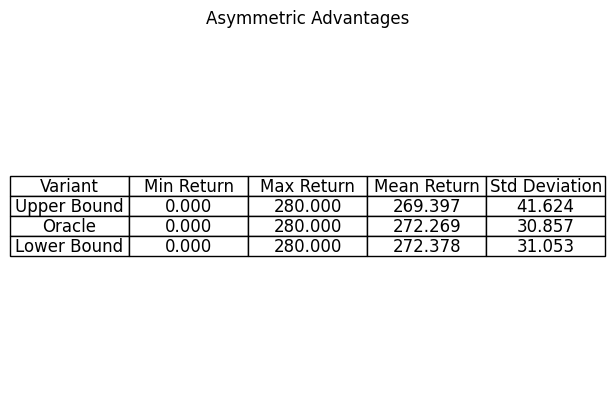

In [74]:
summary_data_asymm = {
    'Variant': ['Upper Bound', 'Oracle', 'Lower Bound'],
    'Min Return': [ub_returns_asymm.min(), op_returns_asymm.min(),lb_returns_asymm.min()],
    'Max Return': [ub_returns_asymm.max(), op_returns_asymm.max(), lb_returns_asymm.max()],
    'Mean Return': [ub_returns_asymm.mean(), op_returns_asymm.mean(), lb_returns_asymm.mean()],
    'Std Deviation': [ub_returns_asymm.std(), op_returns_asymm.std(), lb_returns_asymm.std()]
}

summary_df_asymm = pd.DataFrame(summary_data_asymm)
print(summary_df_asymm)

formatted_df_asymm = summary_df_asymm.copy()
for col in formatted_df_asymm.columns[1:]:
    formatted_df_asymm[col] = formatted_df_asymm[col].apply(lambda x: f"{x:.3f}")

fig, ax = plt.subplots()
ax.axis('tight')
ax.axis('off')
table = ax.table(
    cellText=formatted_df_asymm.values,
    colLabels=formatted_df_asymm.columns,
    cellLoc='center',
    loc='center'
)
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)

plt.title("Asymmetric Advantages")
plt.show()

#### Coordination Ring

Upper Bound

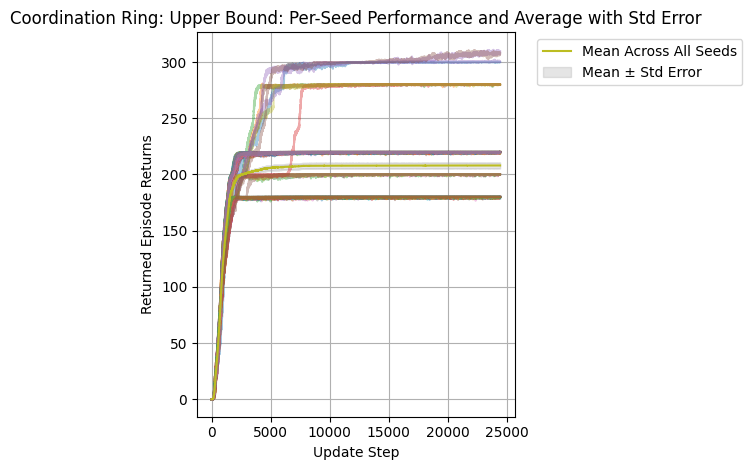

In [13]:
ub_returns_coord = ub_metrics_coord_ring['returned_episode_returns']
ub_reward_mean_coord = ub_returns_coord.mean(axis=0)
ub_reward_std_coord = ub_returns_coord.std(axis=0)
ub_reward_std_err_coord = ub_reward_std_coord / np.sqrt(ub_returns_coord.shape[0])

plt.figure()

for seed_idx in range(ub_returns_coord.shape[0]):
    plt.plot(ub_returns_coord[seed_idx], alpha=0.4)

plt.plot(ub_reward_mean_coord, label='Mean Across All Seeds')

plt.fill_between(
    range(len(ub_reward_mean_coord)),
    ub_reward_mean_coord - ub_reward_std_err_coord,
    ub_reward_mean_coord + ub_reward_std_err_coord,
    alpha=0.2,
    color='gray',
    label='Mean ± Std Error'
)

plt.xlabel("Update Step")
plt.ylabel("Returned Episode Returns")
plt.title("Coordination Ring: Upper Bound: Per-Seed Performance and Average with Std Error")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

Oracle

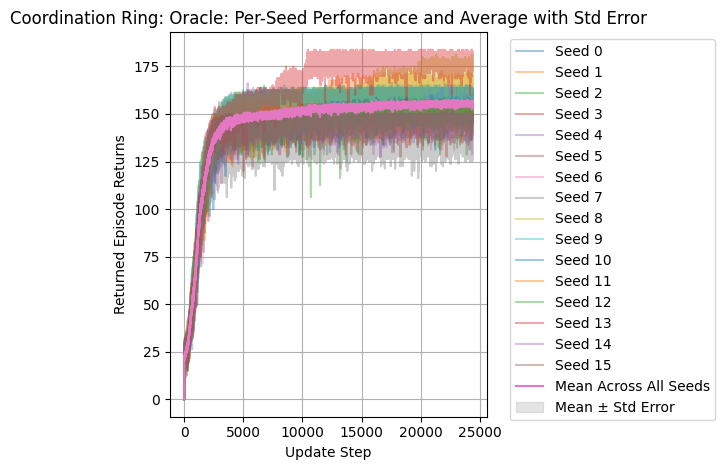

In [18]:
op_returns_coord = op_metrics_coord_ring['returned_episode_returns']
op_reward_mean_coord = op_returns_coord.mean(axis=0)
op_reward_std_coord = op_returns_coord.std(axis=0)
op_reward_std_err_coord = op_reward_std_coord / np.sqrt(op_returns_coord.shape[0])

plt.figure()

for seed_idx in range(op_returns_coord.shape[0]):
    plt.plot(op_returns_coord[seed_idx], alpha=0.4, label=f'Seed {seed_idx}')

plt.plot(op_reward_mean_coord, label='Mean Across All Seeds')

plt.fill_between(
    range(len(op_reward_mean_coord)),
    op_reward_mean_coord - op_reward_std_err_coord,
    op_reward_mean_coord + op_reward_std_err_coord,
    alpha=0.2,
    color='gray',
    label='Mean ± Std Error'
)

plt.xlabel("Update Step")
plt.ylabel("Returned Episode Returns")
plt.title("Coordination Ring: Oracle: Per-Seed Performance and Average with Std Error")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

Lower Bound

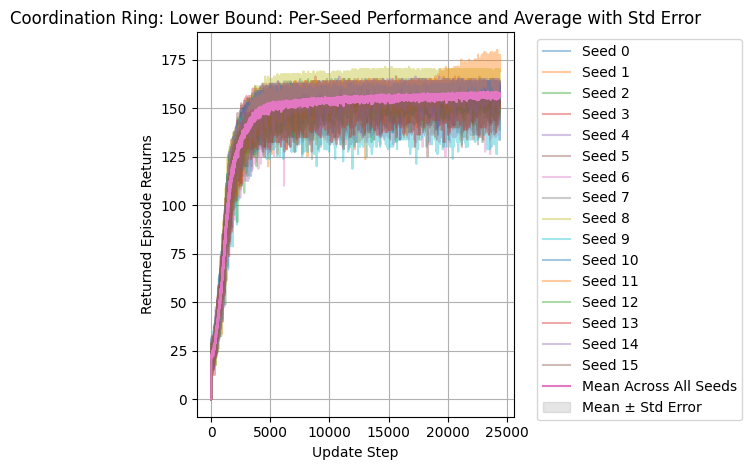

In [83]:
lb_returns_coord = lb_metrics_coord_ring['returned_episode_returns']
lb_reward_mean_coord = lb_returns_coord.mean(axis=0)
lb_reward_std_coord = lb_returns_coord.std(axis=0)
lb_reward_std_err_coord = lb_reward_std_coord / np.sqrt(lb_returns_coord.shape[0])

plt.figure()

for seed_idx in range(lb_returns_coord.shape[0]):
    plt.plot(lb_returns_coord[seed_idx], alpha=0.4, label=f'Seed {seed_idx}')

plt.plot(lb_reward_mean_coord, label='Mean Across All Seeds')

plt.fill_between(
    range(len(lb_reward_mean_coord)),
    lb_reward_mean_coord - lb_reward_std_err_coord,
    lb_reward_mean_coord + lb_reward_std_err_coord,
    alpha=0.2,
    color='gray',
    label='Mean ± Std Error'
)

plt.xlabel("Update Step")
plt.ylabel("Returned Episode Returns")
plt.title("Coordination Ring: Lower Bound: Per-Seed Performance and Average with Std Error")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

Summary Statistics

       Variant  Min Return  Max Return  Mean Return  Std Deviation
0  Upper Bound         0.0      220.00   195.163147      34.069778
1       Oracle         0.0      183.75   145.152267      26.338993
2  Lower Bound         0.0      180.00   146.338257      26.195637


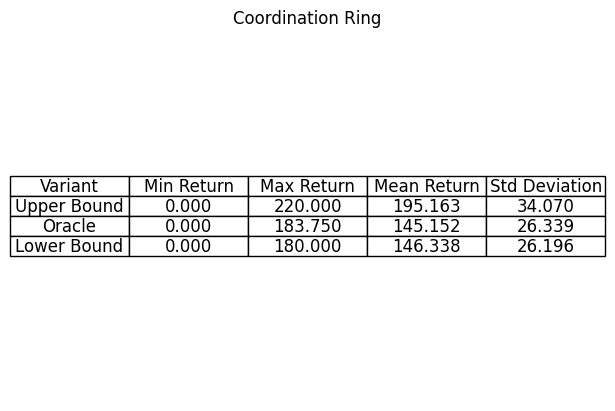

In [84]:
summary_data_coord = {
    'Variant': ['Upper Bound', 'Oracle', 'Lower Bound'],
    'Min Return': [ub_returns_coord.min(), op_returns_coord.min(),lb_returns_coord.min()],
    'Max Return': [ub_returns_coord.max(), op_returns_coord.max(), lb_returns_coord.max()],
    'Mean Return': [ub_returns_coord.mean(), op_returns_coord.mean(), lb_returns_coord.mean()],
    'Std Deviation': [ub_returns_coord.std(), op_returns_coord.std(), lb_returns_coord.std()]
}

summary_df_coord = pd.DataFrame(summary_data_coord)
print(summary_df_coord)

formatted_df_coord = summary_df_coord.copy()
for col in formatted_df_coord.columns[1:]:
    formatted_df_coord[col] = formatted_df_coord[col].apply(lambda x: f"{x:.3f}")

fig, ax = plt.subplots()
ax.axis('tight')
ax.axis('off')
table = ax.table(
    cellText=formatted_df_coord.values,
    colLabels=formatted_df_coord.columns,
    cellLoc='center',
    loc='center'
)
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)

plt.title("Coordination Ring")
plt.show()

#### Countercircuit

Upper Bound

In [ ]:
ub_returns_countercircuit = ub_metrics_countercircuit['returned_episode_returns']
ub_reward_mean_countercircuit = ub_returns_countercircuit.mean(axis=0)
ub_reward_std_countercircuit = ub_returns_countercircuit.std(axis=0)
ub_reward_std_err_countercircuit = ub_reward_std_countercircuit / np.sqrt(ub_returns_countercircuit.shape[0])

plt.figure()

for seed_idx in range(ub_returns_countercircuit.shape[0]):
    plt.plot(ub_returns_countercircuit[seed_idx], alpha=0.4)

plt.plot(ub_reward_mean_countercircuit, label='Mean Across All Seeds')

plt.fill_between(
    range(len(ub_reward_mean_countercircuit)),
    ub_reward_mean_countercircuit - ub_reward_std_err_countercircuit,
    ub_reward_mean_countercircuit + ub_reward_std_err_countercircuit,
    alpha=0.2,
    color='gray',
    label='Mean ± Std Error'
)

plt.xlabel("Update Step")
plt.ylabel("Returned Episode Returns")
plt.title("Countercircuit: Upper Bound: Per-Seed Performance and Average with Std Error")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

NameError: name 'ub_metrics_countercircuit' is not defined

Oracle

In [ ]:
op_returns_countercircuit = op_metrics_countercircuit['returned_episode_returns']
op_reward_mean_countercircuit = op_returns_countercircuit.mean(axis=0)
op_reward_std_countercircuit = op_returns_countercircuit.std(axis=0)
op_reward_std_err_countercircuit = op_reward_std_countercircuit / np.sqrt(op_returns_countercircuit.shape[0])

plt.figure()

for seed_idx in range(op_returns_countercircuit.shape[0]):
    plt.plot(op_returns_countercircuit[seed_idx], alpha=0.4)

plt.plot(op_reward_mean_countercircuit, label='Mean Across All Seeds')

plt.fill_between(
    range(len(op_reward_mean_countercircuit)),
    op_reward_mean_countercircuit - op_reward_std_err_countercircuit,
    op_reward_mean_countercircuit + op_reward_std_err_countercircuit,
    alpha=0.2,
    color='gray',
    label='Mean ± Std Error'
)

plt.xlabel("Update Step")
plt.ylabel("Returned Episode Returns")
plt.title("Countercircuit: Oracle: Per-Seed Performance and Average with Std Error")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

Lower Bound

In [ ]:
lb_returns_countercircuit = lb_metrics_countercircuit['returned_episode_returns']
lb_reward_mean_countercircuit = lb_returns_countercircuit.mean(axis=0)
lb_reward_std_countercircuit = lb_returns_countercircuit.std(axis=0)
lb_reward_std_err_countercircuit = lb_reward_std_countercircuit / np.sqrt(lb_returns_countercircuit.shape[0])

plt.figure()

for seed_idx in range(lb_returns_countercircuit.shape[0]):
    plt.plot(lb_returns_countercircuit[seed_idx], alpha=0.4)

plt.plot(op_reward_mean_countercircuit, label='Mean Across All Seeds')

plt.fill_between(
    range(len(op_reward_mean_countercircuit)),
    op_reward_mean_countercircuit - op_reward_std_err_countercircuit,
    op_reward_mean_countercircuit + op_reward_std_err_countercircuit,
    alpha=0.2,
    color='gray',
    label='Mean ± Std Error'
)

plt.xlabel("Update Step")
plt.ylabel("Returned Episode Returns")
plt.title("Countercircuit: Oracle: Per-Seed Performance and Average with Std Error")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

Summary Statistics

In [ ]:
summary_data_countercircuit = {
    'Variant': ['Upper Bound', 'Oracle', 'Lower Bound'],
    'Min Return': [ub_returns_countercircuit.min(), op_returns_countercircuit.min(),lb_returns_countercircuit.min()],
    'Max Return': [ub_returns_countercircuit.max(), op_returns_countercircuit.max(), lb_returns_countercircuit.max()],
    'Mean Return': [ub_returns_countercircuit.mean(), op_returns_countercircuit.mean(), lb_returns_countercircuit.mean()],
    'Std Deviation': [ub_returns_countercircuit.std(), op_returns_countercircuit.std(), lb_returns_countercircuit.std()]
}

summary_df_countercircuit = pd.DataFrame(summary_data_countercircuit)
print(summary_df_countercircuit)

formatted_df_countercircuit = summary_df_countercircuit.copy()
for col in formatted_df_countercircuit.columns[1:]:
    formatted_df_countercircuit[col] = formatted_df_countercircuit[col].apply(lambda x: f"{x:.3f}")

fig, ax = plt.subplots()
ax.axis('tight')
ax.axis('off')
table = ax.table(
    cellText=formatted_df_countercircuit.values,
    colLabels=formatted_df_countercircuit.columns,
    cellLoc='center',
    loc='center'
)
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)

plt.title("Countercircuit")
plt.show()

#### Forced Coordination

Upper Bound

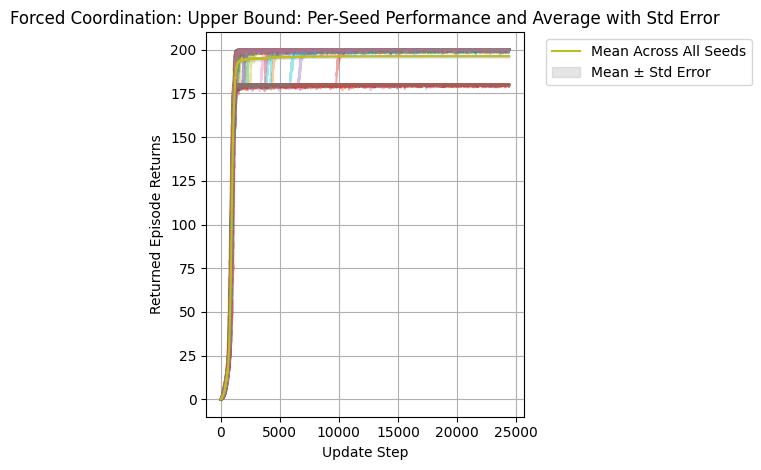

In [10]:
ub_returns_forced_coord = ub_metrics_forced_coord['returned_episode_returns']
ub_reward_mean_forced_coord = ub_returns_forced_coord.mean(axis=0)
ub_reward_std_forced_coord = ub_returns_forced_coord.std(axis=0)
ub_reward_std_err_forced_coord = ub_reward_std_forced_coord / np.sqrt(ub_returns_forced_coord.shape[0])

plt.figure()

for seed_idx in range(ub_returns_forced_coord.shape[0]):
    plt.plot(ub_returns_forced_coord[seed_idx], alpha=0.4,)

plt.plot(ub_reward_mean_forced_coord, label='Mean Across All Seeds')

plt.fill_between(
    range(len(ub_reward_mean_forced_coord)),
    ub_reward_mean_forced_coord - ub_reward_std_err_forced_coord,
    ub_reward_mean_forced_coord + ub_reward_std_err_forced_coord,
    alpha=0.2,
    color='gray',
    label='Mean ± Std Error'
)

plt.xlabel("Update Step")
plt.ylabel("Returned Episode Returns")
plt.title("Forced Coordination: Upper Bound: Per-Seed Performance and Average with Std Error")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

Oracle

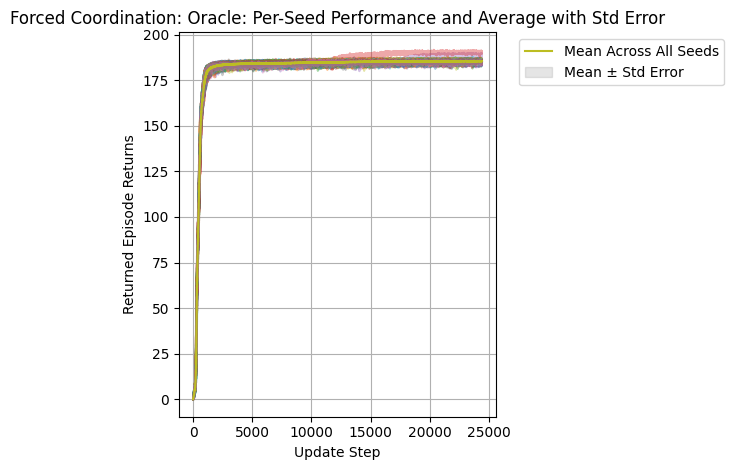

In [11]:
op_returns_forced_coord = op_metrics_forced_coord['returned_episode_returns']
op_reward_mean_forced_coord = op_returns_forced_coord.mean(axis=0)
op_reward_std_forced_coord = op_returns_forced_coord.std(axis=0)
op_reward_std_err_forced_coord = op_reward_std_forced_coord / np.sqrt(op_returns_forced_coord.shape[0])

plt.figure()

for seed_idx in range(op_returns_forced_coord.shape[0]):
    plt.plot(op_returns_forced_coord[seed_idx], alpha=0.4,)

plt.plot(op_reward_mean_forced_coord, label='Mean Across All Seeds')

plt.fill_between(
    range(len(op_reward_mean_forced_coord)),
    op_reward_mean_forced_coord - op_reward_std_err_forced_coord,
    op_reward_mean_forced_coord + op_reward_std_err_forced_coord,
    alpha=0.2,
    color='gray',
    label='Mean ± Std Error'
)

plt.xlabel("Update Step")
plt.ylabel("Returned Episode Returns")
plt.title("Forced Coordination: Oracle: Per-Seed Performance and Average with Std Error")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

Lower Bound

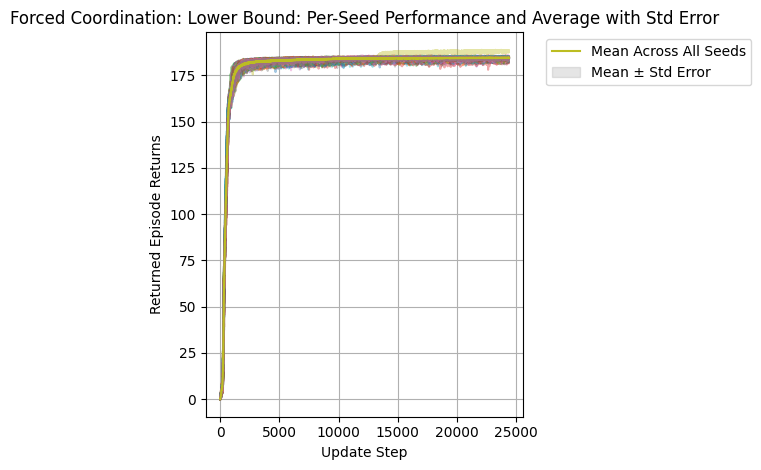

In [12]:
lb_returns_forced_coord = lb_metrics_forced_coord['returned_episode_returns']
lb_reward_mean_forced_coord = lb_returns_forced_coord.mean(axis=0)
lb_reward_std_forced_coord = lb_returns_forced_coord.std(axis=0)
lb_reward_std_err_forced_coord = lb_reward_std_forced_coord / np.sqrt(lb_returns_forced_coord.shape[0])

plt.figure()

for seed_idx in range(lb_returns_forced_coord.shape[0]):
    plt.plot(lb_returns_forced_coord[seed_idx], alpha=0.4,)

plt.plot(lb_reward_mean_forced_coord, label='Mean Across All Seeds')

plt.fill_between(
    range(len(lb_reward_mean_forced_coord)),
    lb_reward_mean_forced_coord - lb_reward_std_err_forced_coord,
    lb_reward_mean_forced_coord + lb_reward_std_err_forced_coord,
    alpha=0.2,
    color='gray',
    label='Mean ± Std Error'
)

plt.xlabel("Update Step")
plt.ylabel("Returned Episode Returns")
plt.title("Forced Coordination: Lower Bound: Per-Seed Performance and Average with Std Error")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

Summary Statistics

       Variant  Min Return  Max Return  Mean Return  Std Deviation
0  Upper Bound         0.0   200.00000   188.687988      35.480202
1       Oracle         0.0   191.71875   181.220932      21.334576
2  Lower Bound         0.0   188.75000   180.045135      21.316904


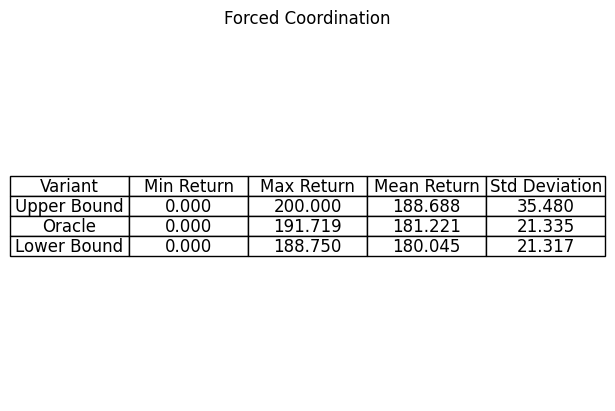

In [14]:
summary_data_forced_coord = {
    'Variant': ['Upper Bound', 'Oracle', 'Lower Bound'],
    'Min Return': [ub_returns_forced_coord.min(), op_returns_forced_coord.min(),lb_returns_forced_coord.min()],
    'Max Return': [ub_returns_forced_coord.max(), op_returns_forced_coord.max(), lb_returns_forced_coord.max()],
    'Mean Return': [ub_returns_forced_coord.mean(), op_returns_forced_coord.mean(), lb_returns_forced_coord.mean()],
    'Std Deviation': [ub_returns_forced_coord.std(), op_returns_forced_coord.std(), lb_returns_forced_coord.std()]
}

summary_df_forced_coord = pd.DataFrame(summary_data_forced_coord)
print(summary_df_forced_coord)

formatted_df_forced_coord = summary_df_forced_coord.copy()
for col in formatted_df_forced_coord.columns[1:]:
    formatted_df_forced_coord[col] = formatted_df_forced_coord[col].apply(lambda x: f"{x:.3f}")

fig, ax = plt.subplots()
ax.axis('tight')
ax.axis('off')
table = ax.table(
    cellText=formatted_df_forced_coord.values,
    colLabels=formatted_df_forced_coord.columns,
    cellLoc='center',
    loc='center'
)
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)

plt.title("Forced Coordination")
plt.show()